In [1]:
import numpy as np
import sys
sys.path.insert(0, r'C:\Users\22mos\Documents\GitHub\Optical-Potential-Test')
from graphics_Mostofa import plot_snapshots, plot_snapshots_by_section,plot_contour

In [2]:
def ising_first_term(i, N):
    
    sigma_x = np.matrix('0 1; 1 0')
    mat_array = np.zeros((N, 2, 2))
    
    for n in range(N):
        if(n == i):
#             print(n)
            mat_array[n] = sigma_x 
        elif((n-1) == i):
#             print(n)
            mat_array[n] = sigma_x 
        else:
#             print(n)
            mat_array[n] = np.eye(2)
        
    out_prod = mat_array[0]
    for n1 in range(N-1):
        out_prod = np.kron(out_prod, mat_array[n1+1])
        
    return out_prod

def ising_second_term(i, N, strength):
    
    sigma_z = np.matrix('1 0; 0 -1')
    mat_array = np.zeros((N, 2, 2))
    
    for n in range(N):
        if(n == i):
            mat_array[n] = sigma_z 
        else:
            mat_array[n] = np.eye(2)
        
    out_prod = mat_array[0]
    for n1 in range(N-1):
        out_prod = np.kron(out_prod, mat_array[n1+1])
        
    return out_prod * strength

In [7]:
def ising_Hamiltonian(N):
    
    """
    Input:
    N -> Number of particles
    
    Output:
    H -> Ising hamiltonian
    """
    strength = 1
    first_term = 0
    second_term = 0
    for n in range(N):
        print(n)
        if(n<N):
            first_term += ising_first_term(n, N) 
        second_term += ising_second_term(n, N, strength) 
        
    H = first_term + second_term
        
    return H

In [8]:
N = 10 
axes = np.arange(0,2**N)
H = ising_Hamiltonian(N)

0
1
2
3
4
5
6
7
8
9


In [9]:
print(H)

[[ 10.   1.   0. ...   0.   0.   0.]
 [  1.   8.   1. ...   0.   0.   0.]
 [  0.   1.   8. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  -8.   1.   0.]
 [  0.   0.   0. ...   1.  -8.   1.]
 [  0.   0.   0. ...   0.   1. -10.]]


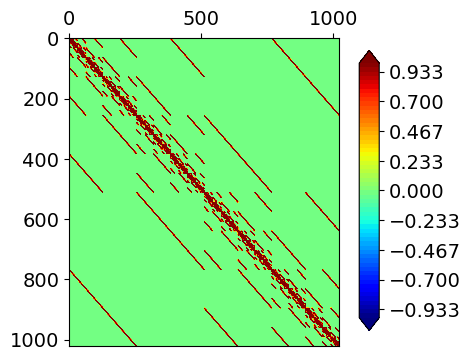

In [11]:
plot_contour(H, axes, axes, axes[0], axes[-1], axes[0], axes[-1], 0, 0, [100], level= 1, optical = False, multiple = False, cutoff = False)